# Importar Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar nuestra Data

In [2]:
df = pd.read_csv("shoes_dataset.csv")
df.head(10)

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00
5,52394,1/1/2014,United States,2173,US15,Male,10.5,43-44,10.0,$159.00,0%,$159.00
6,52395,1/2/2014,Germany,2200,GER2,Female,9.0,39-40,7.0,$179.00,0%,$179.00
7,52396,1/2/2014,Canada,2238,CAN5,Male,10.0,43,9.5,$169.00,0%,$169.00
8,52397,1/2/2014,United States,2191,US13,Male,10.5,43-44,10.0,$139.00,0%,$139.00
9,52398,1/2/2014,United Kingdom,2237,UK1,Female,9.0,39-40,7.0,$149.00,0%,$149.00


# Comprobamos qué tipo de dato tienen nuestras variables

In [3]:
df.dtypes

InvoiceNo          int64
Date              object
Country           object
ProductID          int64
Shop              object
Gender            object
Size (US)        float64
Size (Europe)     object
Size (UK)        float64
UnitPrice         object
Discount          object
SalePrice         object
dtype: object

* Reconocemos que Date debe estar en formato fecha
* El precio unitario tanto como los decuentos así como el precio de venta, deben
ser casteados numéricamente. 

In [4]:
#Convertimos nuestra fecha en una que sea de formato Datetime
df["Date"] = pd.to_datetime(df["Date"])

Comprobamos..

In [5]:
df.dtypes #Como vemos ya lo conseguimos

InvoiceNo                 int64
Date             datetime64[ns]
Country                  object
ProductID                 int64
Shop                     object
Gender                   object
Size (US)               float64
Size (Europe)            object
Size (UK)               float64
UnitPrice                object
Discount                 object
SalePrice                object
dtype: object

# Creamos nuevas columnas... Year, Month & Day 

* El formato anterior de Año/Mes/día es muy recurrente.

In [6]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [7]:
df.sample(5) #Efectivamente los cambios se efectuaron

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Month,Day
10716,61971,2016-06-12,Germany,2205,GER2,Male,9.0,42,8.5,$199.00,10%,$179.10,2016,6,12
8518,60015,2016-02-21,United States,2147,US6,Male,9.5,42-43,9.0,$199.00,0%,$199.00,2016,2,21
6000,57725,2015-09-16,Germany,2226,GER1,Male,11.0,44,10.5,$159.00,0%,$159.00,2015,9,16
4564,56399,2015-06-11,Germany,2228,GER2,Male,10.5,43-44,10.0,$189.00,50%,$94.50,2015,6,11
3707,55615,2015-04-02,United Kingdom,2237,UK2,Female,9.5,40,7.5,$179.00,10%,$161.10,2015,4,2


# Por cierto hay datos nulos?

In [8]:
df.info() #No existen no hay nada de qué preocuparse. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  object        
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  object        
 12  Year           14967 non-null  int64         
 13  Month          14967 non-null  int64         
 14  Day            14967 non-null  int64         
dtypes: datetime64[ns](1

* Procedemos a manipular los precios

In [9]:
#Traemos como es un tipo de dato "SalePrice" antes del cambio
df["UnitPrice"][0]

' $159.00 '

* Visualizamos que el dato posee un problema adicional a solo sobrar el simbolo "$"
* También existen espacios en blanco, lo que impediría convertirlo a un flotante.
* Emplearemo una lista para encargarnos de elo... 

In [10]:
list_unit_price = [float(elemento.strip().replace("$","")) for elemento in df["UnitPrice"]]

In [11]:
list_unit_price[0] #En efecto lo convertimos a un entero

159.0

* En este caso para hacerlo efectivo deberíamos aplicar algo como esto:

In [12]:
#NO EJECUTAR
df.assign(nombre_columna = "objeto_iterable")
#De existir una columna con ese nombre se sobreescribirá
#De no existir se creara una nueva. 
#NO EJECUTAR

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Month,Day,nombre_columna
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00,2014,1,1,objeto_iterable
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20,2014,1,1,objeto_iterable
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20,2014,1,1,objeto_iterable
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00,2014,1,1,objeto_iterable
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00,2014,1,1,objeto_iterable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00,2016,12,31,objeto_iterable
14963,65774,2016-12-31,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00,2016,12,31,objeto_iterable
14964,65775,2016-12-31,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30,2016,12,31,objeto_iterable
14965,65776,2016-12-31,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00,2016,12,31,objeto_iterable


Sin embargo existe una forma alternativa un poco más potente, considerando que no existen datos nulos...

In [13]:
#Esto es muy potente porque aplicamos una funcion simple lambda
#Siendo este un string es una maravilla. 
df["UnitPrice"] = df["UnitPrice"].apply(lambda x: float(x[2:-1]))

* Revisamos el caso de "SalePrice" como es un dato de este apartado?
* Sufre de la misma problemática que el del "UnitPrice"?

In [14]:
#Traemos un dato del apartado SalePrice
df["SalePrice"][0]

' $159.00 '

* Efectivamente padece del mismo problema.
* Usaremos esta vez el método alternativo con lambda

In [15]:
#A diferencia de nuestro otro método, no tendremos que actualizar nuestra tabla
#Al menos no de forma separada
df["SalePrice"] = df["SalePrice"].apply(lambda x: float(x[2:-1]))

* Comprobamos nuestra tabla

In [16]:
df.dtypes #Efectivamente los precios fueron casteados a string

InvoiceNo                 int64
Date             datetime64[ns]
Country                  object
ProductID                 int64
Shop                     object
Gender                   object
Size (US)               float64
Size (Europe)            object
Size (UK)               float64
UnitPrice               float64
Discount                 object
SalePrice               float64
Year                      int64
Month                     int64
Day                       int64
dtype: object

In [17]:
#Veamos una muestra
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Month,Day
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0%,159.0,2014,1,1
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,20%,159.2,2014,1,1
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,20%,119.2,2014,1,1
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0%,159.0,2014,1,1
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0%,159.0,2014,1,1


# ¡Datos Limpios! → Procedemos a Trabajar

* Empecemos por una descripción general. 

In [18]:
df.describe()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,SalePrice,Year,Month,Day
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,143.987913,2015.308211,6.689517,15.745306
std,3889.598714,27.633526,1.511719,1.970014,22.940544,35.180799,0.762320,3.319909,8.719764
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,64.500000,2014.000000,1.000000,1.000000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,125.100000,2015.000000,4.000000,8.000000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,149.000000,2015.000000,7.000000,16.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,169.000000,2016.000000,10.000000,23.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,199.000000,2016.000000,12.000000,31.000000


* Es posible que solo admitan una descripción algunos datos. 

# ¿Qué podemos Analizar?

* La Variable InvoiceNo no resiste análisis
* La Variable ProductID no resiste análisis
* La Variable Size (US): 
    * Cuenta con 14967 registros
    * Su media es alrededor de 9.19
    * La talla mínima a la venta es de 4.5
    * La talla máxima a la venta es de 15
* La Variable Size (UK) es una simple conversión de la Variable Size(US)
* La Variable de UnitPrice:
    * Cuenta con registros completos
    * Su media es de alrededor 164.17 dolares
    * Cuenta con una desviación estándar de 22.94 lo que indica una dispersión a considerar. 
    * El precio unitario más bajo es de 129
    * El precio unitario más alto es de 199
* La Variable SalePrice:
    * Cuenta con registros completos
    * Una media inferior a la variable anterior rondando los 143.98
    * Esto junto a su desviación estándar más pronunciada (35.18) se puede explicar
    * Dado a que estos precios están sometidos a descuentos, factor que hace de los datos actuales mucho más dispersos. 
    * El precio de venta mínimo es de 64.5
    * El precio de venta máximo es de 199.0
* Las Variables restantes no resisten análisis. 

# Procedemos a plasmar la Información de forma Visual. 

* Primero deberemos obtener los nombres de nuestras variables categóricas y numéricas en listas. 
* Las que consideremos más importantes. 

In [19]:
#Estas son nuestras variables categóricas - nominales 
var_categorical = ["Country","ProductID","Shop","Gender","Size (US)","Discount","Year","Month"] #Usamos solo una talla. Porque es simple conversión.
#Dejamos de lado día ya que ser tan específicos podría ser contraproductente. 

#Estas son nuestras variables numéricas - continuas. 
var_numerical = ["UnitPrice","SalePrice"]

* Comenzamos con la construcción de nuestros gráficos.

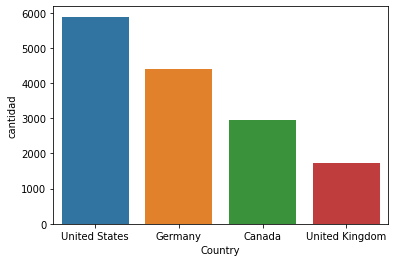

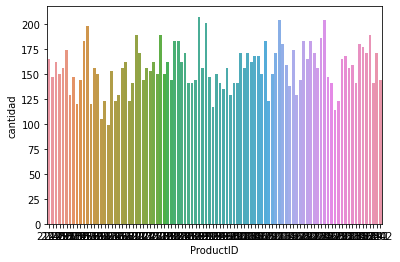

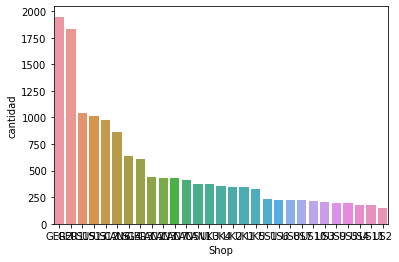

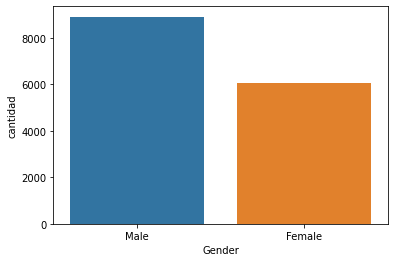

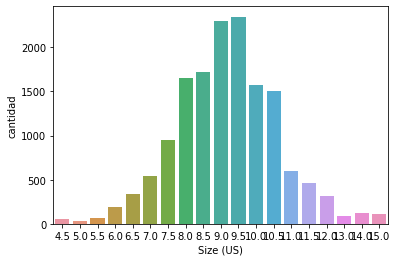

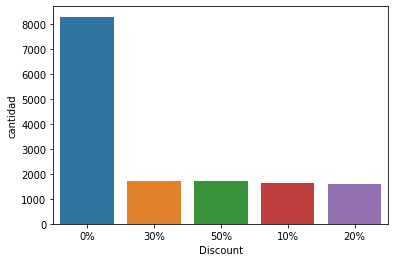

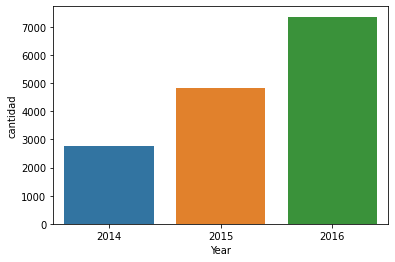

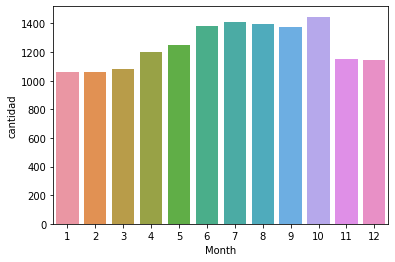

In [20]:
for elemento in var_categorical:
    frecuencia = df[elemento].value_counts()
    df_frecuencia = pd.DataFrame({elemento:frecuencia.index.to_list(), "cantidad": frecuencia.to_list()})
    sns.barplot(x = elemento,y = "cantidad",data=df_frecuencia)
    plt.show()

Tras un análisis incipiente de los Gráficos Obtenemos lo Siguiente: 
* Frecuencia según País donde se realizó la venta:
    * Existe gran dominancia de ventas en países como USA y Canada.
    * Siendo UK el país donde se produjo menos ventas. 
* Frecuencia según ID de Productos: 
    * La ventas ventas en un primer vistazo parecen ser uniformes
    * Aunque dada la cantidad productos diferentes un análisis completo se complica.
    * Lo retomaremos en otro momento.  
* Frecuencia según tienda donde se realizaron las ventas: 
    * Se nos muestra un gráfico ordenado con descendencia hacia la derecha 
    * Sería recomendable en este caso obtener el TOP 10 de tiendas donde se produjeron más ventas. 
* Frecuencia según el Sexo de Cliente que participó en una venta:
    * Los resultados demuestran una dominancia del parte del consumidor masculino
    * De igual modo las ventas hacia clientes femeninas no es para nada despreciable
* Frecuencia según las Tallas de las zapatillas que se vendieron: 
    * Existe al parecer un cierto parecido a una gráfica de distribución de tipo normal. 
    * Tal parece que las ventas se agrupan en tallas que se acercan mucho más al promedio, el cual como analizamos ronda la talla 9. 
* Frecuencia según los descuentos aplicados a las zapatillas a la hora de la venta: 
    * Al parecer la mayoría de productos fueron adquiridos sin ningún dscto de por medio. 
    * Sorpresivamente, al aplicarse un dscto cualquiera se tiene a consumir un determinado número, el cual puede rondar entre las 1700 o 1800 unidades.
* Frecuencia de las ventas, considerando el año: 
    * Favorablemente se muestra un crecimiento de las ventas por año
    * Esta muestra ser consistente, dejando claro que las ventas se concentrar en los dos últimos años. 
* Frecuencia de las ventas, según los meses donde se realizó la venta: 
    * Al parecer a comienzos y a finales de año, las ventas se resiente. 
    * Donde se acumulan las ventas es mientras más nos acercamos a mediados de año
    * Aunque de igual modo, no se debería despreciar el mes de Octubre como mes para potenciar las ventas probablemente exista una variable que explique este comportamiento. 

# Obteniendo el Top 10 de Tiendas que lograron mayor cantidad de ventas. 

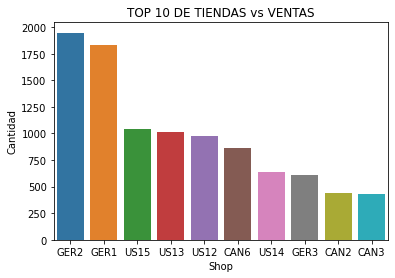

In [21]:
#NO TE OLVIDES DE LOS PARENTESIS; CAMBIA UNA FUNCION!!
frecuencia = df["Shop"].value_counts().head(10)
df_frecuencia = pd.DataFrame({"Shop":frecuencia.index.to_list(), "Cantidad": frecuencia.to_list()})
sns.barplot(x = "Shop",y = "Cantidad",data = df_frecuencia)
#Agregar Título al gráfico
plt.title("TOP 10 DE TIENDAS vs VENTAS")
plt.show()

* Ahora tenemos un gráfico mucho más claro. 

* Contrariamente a lo que podríamos pensar, las tiendas líderes en ventas parecen ser las Alemanas. Tanto la Segunda como la Primera.
* Normalmente, esperaríamos de inmediato la presencia de tiendas en USA, detalle que en efecto acontece.
* Las tiendas que ocupan el final del TOP son las canadienses. 
* Podemos deducir que al UK no asomarse en término de tiendas (En el top) es coherente con el hecho de ocupar el último lugar en ventas por país. 

# Dibujado de Nuestras Variables Numéricas. 

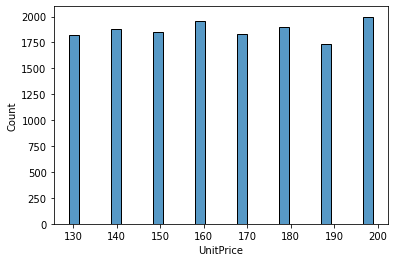

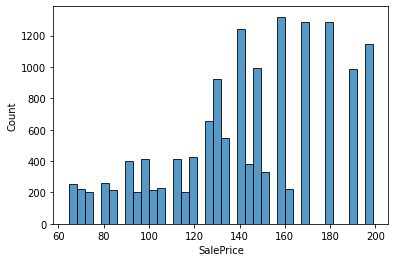

In [22]:
#Cuando empleamos variables numericas
for elemento in var_numerical:
    sns.histplot(df[elemento],bins="auto") #Hitsplot para variables numéricas
    plt.show()

* En cuanto a los productos y su precio unitario, estos suelen venderse de forma homogénea. 
* En cuanto a los productos y su precio de venta, es facilmente apreciable el consumo de zapatillas con descuentos aplicados. Una distribución con cola hacia la izquierda. 

# Planteamiento de la Solución : "Problema de Inventario"

* De forma que podamos vencer a la intuicion crearemos una matriz de correlación. 
* Calculamos así el coeficiente de correlación. 

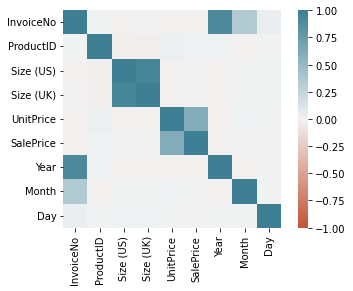

In [23]:
corr = df.corr()
#Heatmap para correlacion
sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
plt.show()


* Muchas de las Correlaciones lamentablemente son inservibles
* La única información que podemos obtener es sobre La relación de Precio Unitario con Precio de Venta, la cual para este punto ya parece más que obvia. 

# Ahora Bien...

* La primera pregunta que deberíamos responder: ¿Cuantás Zapatillas como máximo podríamos vender quizás el año entrante?

In [24]:
#Metodo de Intervalo de Confianza. Calculando. 

* Debemos tener en cuenta que para que nuestra propuesta sea válida debemos distinguir entre muestra y población. 
* Nuestro caso actual nos otorga una "MUESTRA"
* Dado a esto usaremos una distribución "T"
* ATENCIÖN: Se usa distribución "Z" cuando conocemos la desviación estándar de una población
* Y se usa una distribución "T" cuando se conoce la misma pero con respecto a una muestra (NUESTRO CASO) 

# ¿Qué Necesitamos?

* La Media de la muestra
* Nivel de confianza que deseamos (95%)
* n: Cantidad de la muestra
* error estándar, la desviación estándar de la muestra/ raiz cuadrada de nuestros datos. 

In [27]:
#Creamos una condicion que nos parezca conveniente. 
#No contamos el Año 2014 puesto a que las ventas se agrupan en 2015 y 2016
#Nos enfocamos en el género masculino porque son el publico dominante
#Nos centramos en USA por ser el país lideres en ventas
condicion = (df["Year"] != 2014) & (df["Gender"] == "Male") & (df["Country"] == "United States")
#Agrupamos por tallas que debo mandar a hacer, por año y mes. 
#size, para visualizarlo
#unstack para decidir cual será una columna
#y las filas sin datos serán 0
df[condicion].groupby(["Size (US)","Year","Month"]).size().unstack(level=0).fillna(value = 0) #Agrupamos por nuestras columnas, size que nos ayudara a contar aquellos agrupados con esas condiciones. 
#unstack, determinamos un campo que sera la columna en este la talla de zapatillas a fabricar, nuestras filas con NAN serán 0

Size (US)   6.0   6.5   7.0   7.5   8.0   8.5   9.0   9.5   10.0  10.5  11.0  \
Year Month                                                                     
2015 1       0.0   4.0   0.0   0.0   5.0   4.0  10.0  18.0   8.0   7.0   5.0   
     2       0.0   1.0   0.0   1.0   3.0   5.0  14.0  16.0  13.0  13.0   5.0   
     3       0.0   0.0   0.0   2.0   1.0   3.0   7.0  23.0  13.0   8.0   4.0   
     4       0.0   1.0   0.0   1.0   0.0   1.0   9.0  15.0  15.0   8.0   7.0   
     5       3.0   0.0   1.0   0.0   6.0   2.0  17.0  16.0   7.0  15.0   5.0   
     6       1.0   0.0   2.0   0.0   6.0  11.0  16.0  16.0  20.0  10.0   5.0   
     7       1.0   2.0   1.0   3.0   4.0   6.0  20.0  19.0  22.0  16.0   4.0   
     8       3.0   3.0   0.0   2.0   0.0   6.0  21.0  26.0  18.0   8.0   6.0   
     9       5.0   0.0   1.0   3.0   5.0   4.0  13.0  25.0  22.0  16.0   3.0   
     10      4.0   1.0   2.0   2.0   6.0  12.0  17.0  17.0  15.0  16.0   5.0   
     11      0.0   3.0   2.0   2.0   3.0   4.0  10.0  35.0  11.0  17.0   5.0   
     12      0.0   3.0   3.0   2.0   3.0   2.0  12.0  24.0  14.0  14.0  10.0   
2016 1       4.0   3.0   0.0   3.0   7.0  12.0  17.0  19.0  17.0  13.0   5.0   
     2       1.0   2.0   0.0   2.0   9.0  12.0  13.0  25.0  26.0  16.0  16.0   
     3       3.0   0.0   1.0   3.0   7.0   8.0  13.0  27.0  26.0  22.0  13.0   
     4       1.0   1.0   0.0   1.0   3.0   8.0  11.0  24.0  19.0  14.0  10.0   
     5       3.0   0.0   6.0   7.0  12.0  15.0  21.0  26.0  16.0  28.0  10.0   
     6       3.0   0.0   4.0   0.0   2.0   9.0  22.0  33.0  31.0  19.0  11.0   
     7       3.0   1.0   4.0   7.0   9.0  17.0  25.0  25.0  25.0  18.0  15.0   
     8       4.0   7.0   2.0   3.0   4.0  17.0  30.0  47.0  24.0  15.0   8.0   
     9       3.0   2.0   3.0   4.0   7.0   6.0  26.0  31.0  23.0  19.0   9.0   
     10      7.0   1.0   0.0   6.0   5.0   9.0  25.0  44.0  31.0  21.0   7.0   
     11      3.0   2.0   0.0   1.0   2.0  10.0  13.0  37.0  15.0  16.0   6.0   
     12      0.0   1.0   0.0   1.0   6.0   6.0  10.0  26.0  20.0  10.0   7.0   

Size (US)   11.5  12.0  13.0  14.0  15.0  
Year Month                                
2015 1       3.0   1.0   0.0   1.0   0.0  
     2       3.0   0.0   0.0   2.0   0.0  
     3       2.0   0.0   1.0   1.0   0.0  
     4       3.0   3.0   0.0   2.0   0.0  
     5       6.0   1.0   1.0   1.0   1.0  
     6       9.0   4.0   3.0   0.0   0.0  
     7       6.0   1.0   1.0   3.0   0.0  
     8       6.0   2.0   0.0   3.0   1.0  
     9       3.0   4.0   0.0   0.0   1.0  
     10      8.0   3.0   3.0   1.0   0.0  
     11      3.0   6.0   0.0   2.0   1.0  
     12      7.0   3.0   1.0   2.0   1.0  
2016 1       4.0   3.0   1.0   2.0   0.0  
     2       3.0   0.0   1.0   6.0   0.0  
     3       6.0   0.0   2.0   3.0   0.0  
     4       3.0   4.0   0.0   3.0   1.0  
     5       3.0   4.0   3.0   5.0   1.0  
     6       5.0   4.0   2.0   3.0   0.0  
     7       6.0   3.0   1.0   2.0   4.0  
     8       4.0  12.0   0.0   1.0   0.0  
     9       5.0   4.0   0.0   0.0   0.0  
     10     12.0   9.0   4.0   1.0   0.0  
     11     13.0   2.0   3.0   2.0   0.0  
     12      5.0   1.0   2.0   1.0   2.0

* Calcularamos el intervalo de confianza por columna, para estar al tanto de que inventario poseer de cada talla de zapatilla para proximas oportunidades. 

In [5]:
import pandas as pd
fruit_list = [ ('Orange', 34, 'Yes' ,'ABC') ,
             ('Mango', 24, 'No','ABC' ) ,
             ('banana', 14, 'No','ABC' ) ,
             ('Apple', 44, 'Yes',"XYZ" ) ,
             ('Pineapple', 64, 'No',"XYZ") ,
             ('Kiwi', 84, 'Yes',"XYZ")  ]

df = pd.DataFrame(fruit_list, columns = ['Name' , 'Price', 'In_Stock',"Supplier"]) 
grouped_df = df.groupby(['In_Stock', 'Supplier']) 
  
print(grouped_df.size().unstack(level=0))

In_Stock  No  Yes
Supplier         
ABC        2    1
XYZ        1    2
